# Predicting Hotel Booking Cancellations

### Author: **Ade Dwi Aryani**

### Description:

Hotel booking cancellations are a significant concern for the hospitality industry, impacting revenue and operational efficiency. Accurate predictions of cancellations can help hotels manage resources more effectively and minimize financial losses.

This project focuses on developing a predictive model to determine the likelihood of hotel booking cancellations. By analyzing a dataset with numerous features such as lead time, deposit type, and special requests, the project addresses key challenges in data preprocessing, including feature selection, handling missing values, and managing data noise. The approach involves training various models, evaluating their performance with appropriate metrics, and interpreting results to identify the most significant factors influencing cancellations. This model aims to help hotels optimize revenue and improve operational planning by providing insights into booking behaviors.



### Dataset:
1. Dictionary:https://docs.google.com/spreadsheets/d/12aL9FspJNdasRCNuBWRP27nHYBYPJtMxFcvpCdmXoyQ/edit?usp=sharing
2. Dataset: https://docs.google.com/spreadsheets/d/1DFR48j5wmrNio_mvEWDYhy883AR5PB0RWddl2HPdFG0/edit?usp=sharing
## Outline:
1. Data Extraction
2. Data Cleaning
3. Exploratory Data Analysis (EDA)
4. Clustering Analysis
5. Predictive Modeling
6. Insights and Business Recommendations

## Objective:
The objective of this project is to enhance risk management in financial lending by first performing customer segmentation through clustering and then building a machine learning model to predict loan default risk.

1. To conduct Exploratory Data Analysis (EDA) to identify key factors and patterns influencing hotel booking cancellations for better decision-making.

2. To perform Clustering Analysis to segment bookings and reveal insights into behaviors affecting cancellations, aiding targeted strategies.

3. To build and evaluate Predictive Models to forecast cancellations accurately, helping hotels optimize revenue management and operational planning.


## Import Libraries

In [1]:
# General Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")
import gdown

# Data Preparation Libraries
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Classification Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Evaluation Metrics Libraries
from sklearn.metrics import (f1_score, accuracy_score, precision_score, recall_score,
                             confusion_matrix, classification_report, roc_curve, roc_auc_score)

# Segmentation/Clustering Libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
pd.set_option('display.max_columns', None)

## 1. Data Extraction

In [3]:
# Replace the Google Sheets URL to get CSV format
sheet_url = 'https://docs.google.com/spreadsheets/d/1Y-UcWZnbc0arLk2-_DfSJbiGbh2GgJFKzckhoADQwlQ/edit?usp=sharing'
sheet_url_replace = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# To show the link to CSV
print(sheet_url_replace)

# Attempt to load the CSV into a pandas dataframe
df_raw = pd.read_csv(sheet_url_replace, sep=',')
df_raw.head()

https://docs.google.com/spreadsheets/d/1Y-UcWZnbc0arLk2-_DfSJbiGbh2GgJFKzckhoADQwlQ/export?format=csv


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2021,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2021,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2021,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2021,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2021,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2021,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
# Make a copy of the original data for data cleaning
df = df_raw.copy()

## 2. Data Cleaning

### 2.1 Understanding The Dataset


In [5]:
df.shape
print('Number of rows is: ', df.shape[0])
print('Number of columns is: ', df.shape[1])

Number of rows is:  119390
Number of columns is:  36


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Insight from Dataset**

* __Number of Entries__: The dataset consists of __119,390 entries__.

* __Columns__: The dataset contains __36 columns__, which represent various attributes related to hotel bookings.

* __Data Types__:
    - A majority of the columns, 16 to be precise, are of the __object__ data type (often representing strings or categorical data).
    - 16 columns are of the __int64__ data type, representing integer values.
    - 4 columns are of the __float64__ data type, which typically denotes decimal values.

* __Missing Values__:
    - The column `children` has 4 missing values.
    - The column `country` has 488 missing values.
    - The column `agent` has 16,340 missing values.
    - The column `company` has a significant number of missing values, totaling 112,593.

These missing values might need addressing, depending on the context of the analysis or the model we intend to build.

In [7]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2022.156554,0.707476,2021.00,2022.00,2022.000,2023.0,2023.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


**Numerical Variables:**

* __`lead_time`__: The average time between booking and arrival is approximately 104 days, ranging from 0 to 737 days.
    

* __`arrival_date_week_number`__: The average week number of the year for arrival is approximately 27.17, ranging from 1 to 53.

    
* __`arrival_date_day_of_month`__: The average day of the month of arrival is approximately 15.80, ranging from 1 to 31.
    
    
* __`stays_in_weekend_nights`__: On average, guests stay for around 0.93 weekend nights, with some guests staying for as long as 19 weekend nights.
    
    
* __`stays_in_week_nights`__: On average, guests stay for about 2.5 week nights, with stays ranging from 0 to 50 week nights.
    
    
* __`adults`__: The average number of adults per booking is approximately 1.86, with a range from 0 to 55 adults.
    
    
* __`children`__: On average, there are about 0.1 children per booking, with a maximum of 10 children in some bookings.
    
    
* __`babies`__: The average number of babies per booking is very low, approximately 0.008, with a maximum of 10 babies in some bookings.
    
    
* __`previous_cancellations`__: On average, guests have canceled about 0.09 times in the past, with some guests having as many as 26 previous cancellations.
    
    
* __`previous_bookings_not_canceled`__: On average, guests have not canceled about 0.14 bookings in the past, with some guests having as many as 72 previous bookings that they didn't cancel.
    
    
* __`booking_changes`__: Bookings are changed on average about 0.22 times, with some bookings being changed up to 21 times.
    
    
* __`days_in_waiting_list`__: The average time a booking spends on the waiting list is approximately 2.32 days, with some bookings waiting for as long as 391 days.
    
    
* __`adr`__: The Average Daily Rate is about 101.83, with rates ranging from -6.38 (which might indicate errors or special cases) to 5400.
    
    
* __`required_car_parking_spaces`__: On average, guests require about 0.06 parking spaces, with some bookings requiring up to 8 spaces.
    
    
* __`total_of_special_requests`__: On average, guests make about 0.57 special requests, with some making up to 5 requests.

**Noisy Data Features:**

Based on the descriptions and the inferences provided earlier, the following features seem to contain noisy data:

1. __`adr`__: The Average Daily Rate (ADR) represents the average amount a guest pays for a room per day. In this dataset, ADR has a minimum value of -6.38. A negative rate doesn't make sense, indicating potential errors or special cases.

    
2. __`adults`__: The minimum value is 0, which implies bookings without any adults. This could be a data entry error unless there are legitimate cases where only children or babies book a room.

    
3. __`children`__ and __`babies`__: Both have a maximum value of 10, which seems unusually high for a single booking. This could be a potential outlier or data entry error, but it would require more context or domain knowledge to say definitively.

Further investigation, possibly involving domain expertise or additional context, would be necessary to determine the true nature of these data points.

In [8]:
# Get the summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


**Categorical Variables:**

* __`hotel`__: There are two types of hotels, with "City Hotel" being the most frequent category, occurring 79,330 times out of 119,390 entries.

    
* __`is_canceled`__: Two unique values (0 for not canceled and 1 for canceled) are present. The most common value is "0" (not canceled), occurring 75,166 times.

    
* __`arrival_date_year`__: There are three unique years present, with 2016 being the most frequent year of arrival, observed 56,707 times.

    
* __`arrival_date_month`__: There are 12 unique months. August is the most frequent month of arrival, observed 13,877 times.

    
* __`meal`__: Five unique types of meals are booked. The most common type is "BB", observed 92,310 times.

    
* __`country`__: 178 unique countries of origin are present. The most frequent country is "PRT" (Portugal), observed 48,590 times.

    
* __`market_segment`__: Eight unique market segments are present. The most common segment is "Online TA", observed 56,477 times.

    
* __`distribution_channel`__: Five unique booking distribution channels are present, with "TA/TO" being the most frequent, observed 97,870 times.

    
* __`is_repeated_guest`__: Two unique values (0 for not repeated and 1 for repeated) are present. The most frequent value is "0" (not repeated), observed in the majority of entries.

    
* __`reserved_room_type`__ and __`assigned_room_type`__: Various room types are present, with some types being more frequent than others.

    
* __`deposit_type`__: Three unique types of deposits are made. The most common type is "No Deposit", observed 104,641 times.


* __`agent`__: There are 334 unique agents, with '9.0' being the most frequent, occurring 31,961 times.
    
    
* __`company`__: There are 353 unique companies, but '__nan__' (missing values) is the most frequent, occurring 112,593 times. This indicates that the 'company' variable has a high percentage of missing values.
    
    
* __`customer_type`__: Four unique customer types are present. The most frequent type is "Transient", observed 89,613 times.

    
* __`reservation_status`__: Three unique reservation statuses are present. The most common status is "Check-Out", observed 75,166 times.


* __`reservation_status_date`__: There are 926 unique values, with '2015-10-21' being the most frequent, occurring 1,461 times.


* __`name`__: There are 81,503 unique names, with 'Michael Johnson' being the most frequent, occurring 48 times.
    

* __`email`__: There are 115,889 unique email addresses, with 'Michael.C@gmail.com' being the most frequent, occurring 6 times.
    
    
* __`phone-number`__: There are 119,390 unique phone numbers, indicating that almost every guest has a unique phone number.
    
    
* __`credit_card`__: There are 9,000 unique credit card numbers, with '************4923' being the most frequent, occurring 28 times.

### 2.2 Checking for Unique Values and Handle Typo Data


In [9]:
# Check unique data in categorical columns
for column in df.select_dtypes(include=['object']).columns:
  num_unique = df[column].nunique()
  print(f"Number of unique '{column}' is {num_unique}")

Number of unique 'hotel' is 2
Number of unique 'arrival_date_month' is 12
Number of unique 'meal' is 5
Number of unique 'country' is 177
Number of unique 'market_segment' is 8
Number of unique 'distribution_channel' is 5
Number of unique 'reserved_room_type' is 10
Number of unique 'assigned_room_type' is 12
Number of unique 'deposit_type' is 3
Number of unique 'customer_type' is 4
Number of unique 'reservation_status' is 3
Number of unique 'reservation_status_date' is 926
Number of unique 'name' is 81503
Number of unique 'email' is 115889
Number of unique 'phone-number' is 119390
Number of unique 'credit_card' is 9000


In [10]:
# Count the values
list_obj = ['hotel', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type',
            'assigned_room_type','deposit_type', 'customer_type', 'reservation_status',
            'reservation_status']

for i in list_obj:
    unique_data = df[i].value_counts()
    print(unique_data.to_markdown(), '\n\n')

| hotel        |   count |
|:-------------|--------:|
| City Hotel   |   79330 |
| Resort Hotel |   40060 | 


| country   |   count |
|:----------|--------:|
| PRT       |   48590 |
| GBR       |   12129 |
| FRA       |   10415 |
| ESP       |    8568 |
| DEU       |    7287 |
| ITA       |    3766 |
| IRL       |    3375 |
| BEL       |    2342 |
| BRA       |    2224 |
| NLD       |    2104 |
| USA       |    2097 |
| CHE       |    1730 |
| CN        |    1279 |
| AUT       |    1263 |
| SWE       |    1024 |
| CHN       |     999 |
| POL       |     919 |
| ISR       |     669 |
| RUS       |     632 |
| NOR       |     607 |
| ROU       |     500 |
| FIN       |     447 |
| DNK       |     435 |
| AUS       |     426 |
| AGO       |     362 |
| LUX       |     287 |
| MAR       |     259 |
| TUR       |     248 |
| HUN       |     230 |
| ARG       |     214 |
| JPN       |     197 |
| CZE       |     171 |
| IND       |     152 |
| KOR       |     133 |
| GRC       |     128 |
|

* Based on the analysis, no typos were found in the dataset.

### 2.3 Irrelevant Values


Column Descriptions:


| __Index__ | __Variable__ | __Description__ |
|   :---    |     :---     |       :---      |
| 1 | __hotel__ | Type of hotel (Resort Hotel, City Hotel) |
| 2 | __is_canceled__ | Reservation cancellation status (0 = not canceled, 1 = canceled) |
| 3 | __lead_time__ | Number of days between booking and arrival |
| 4 | __arrival_date_year__ | Year of arrival |
| 5 | __arrival_date_month__ | Month of arrival |
| 6 | __arrival_date_week_number__ | Week number of the year for arrival |
| 7 | __arrival_date_day_of_month__ | Day of the month of arrival |
| 8 | __stays_in_weekend_nights__ | Number of weekend nights (Saturday and Sunday) the guest stayed or booked |
| 9 | __stays_in_week_nights__ | Number of week nights the guest stayed or booked |
| 10 | __adults__ | Number of adults |
| 11 | __children__ | Number of children |
| 12 | __babies__ | Number of babies |
| 13 | __meal__ | Type of meal booked (BB, FB, HB, SC, Undefined) |
| 14 | __country__ | Country of origin of the guest |
| 15 | __market_segment__ | Market segment designation |
| 16 | __distribution_channel__ | Booking distribution channel |
| 17 | __is_repeated_guest__ | If the guest is a repeat customer (0 = not repeated, 1 = repeated) |
| 18 | __previous_cancellations__ | Number of previous bookings that were canceled by the customer |
| 19 | __previous_bookings_not_canceled__ | Number of previous bookings that were not canceled by the customer |
| 20 | __reserved_room_type__ | Type of reserved room |
| 21 | __assigned_room_type__ | Type of assigned room |
| 22 | __booking_changes__ | Number of changes made to the booking |
| 23 | __deposit_type__ | Type of deposit made (No Deposit, Refundable, Non Refund) |
| 24 | __agent__ | ID of the travel agent responsible for the booking |
| 25 | __company__ | ID of the company responsible for the booking |
| 26 | __days_in_waiting_list__ | Number of days the booking was in the waiting list |
| 27 | __customer_type__ | Type of customer (Transient, Contract, Transient-Party, Group) |
| 28 | __adr__ | Average Daily Rate |
| 29 | __required_car_parking_spaces__ | Number of car parking spaces required |
| 30 | __total_of_special_requests__ | Number of special requests made |
| 31 | __reservation_status__ | Last reservation status (Check-Out, Canceled, No-Show) |
| 32 | __reservation_status_date__ | Date of the last reservation status |
| 33 | __name__ | Guest's name |
| 34 | __email__ | Guest's email address |
| 35 | __phone-number__ | Guest's phone number |
| 36 | __credit_card__ | Last four digits of the guest's credit card |

For predicting loan defaults, every column in the dataset is important. Each one gives us useful details about the borrower, like their income, credit score, and loan information. Since all these features help us understand the risk of default, none of them should be left out of the analysis.

In [11]:
# Drop irrelevant columns because they are not relevant
df_clean = df.drop(columns=['agent', 'company', 'phone-number', 'credit_card'])

### 2.4 Duplicated Data


To keep our data accurate, we looked for any duplicate entries in the dataset, especially focusing on the LoanID column, which should be unique for each loan. Checking for duplicates is important to make sure our analysis is correct and trustworthy.

In [12]:
# Check for duplicate rows
duplicates = df_clean.duplicated()

# Print the number of duplicate rows
print(f'Number of duplicate rows: {duplicates.sum()}')

# Optional: View duplicate rows
duplicate_rows = df_clean[duplicates]
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date, name, email]
Index: []


* The result of the duplicate check shows an empty DataFrame.

### 2.5 Convert Data Type

In [13]:
# Check data types
print(df_clean.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

Since the data types are already correct and align with the expected formats, no data type conversions are needed at this time. All columns are properly set up for accurate analysis.

In [14]:
# Assuming 'arrival_date_day_of_month' is available and you want to include it
df_clean['arrival_date'] = pd.to_datetime(df_clean['arrival_date_year'].astype(str) + '-' +
                                          df_clean['arrival_date_month'] + '-' +
                                          df_clean['arrival_date_day_of_month'].astype(str),
                                          format='%Y-%B-%d', errors='coerce')

In [15]:
# Function to determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Ensure 'arrival_date' is already in datetime format
df_clean['arrival_date'] = pd.to_datetime(df_clean['arrival_date_year'].astype(str) + '-' +
                                          df_clean['arrival_date_month'] + '-' +
                                          df_clean['arrival_date_day_of_month'].astype(str),
                                          format='%Y-%B-%d', errors='coerce')

# Create the 'season' column based on the month extracted from 'arrival_date'
df_clean['season'] = df_clean['arrival_date'].dt.month.apply(get_season)

# Display the result
df_clean[['arrival_date', 'season']].head()

,arrival_date,season
0,2021-07-01,Summer
1,2021-07-01,Summer
2,2021-07-01,Summer
3,2021-07-01,Summer
4,2021-07-01,Summer


Changing children from float64 to int64:
- The children column should be an integer because the number of children cannot be a fraction. Converting it to int64 ensures that the data type accurately represents the nature of the data.

Changing reservation_status_date to datetime:

Explanation: reservation_status_date is a date field, and converting it to datetime allows for better manipulation and analysis of date-related data.

In [16]:
# Print the data types of each column after cleaning
print(df_clean.dtypes)

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

### 2.6 Handling Missing Values

In [17]:
# Calculate the number of missing values
missing_values = df_clean.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df_clean)) * 100

# Combine both number and percentage of missing values into a DataFrame
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display the DataFrame
print(missing_info)

                                Missing Values  Percentage
hotel                                        0    0.000000
is_canceled                                  0    0.000000
lead_time                                    0    0.000000
arrival_date_year                            0    0.000000
arrival_date_month                           0    0.000000
arrival_date_week_number                     0    0.000000
arrival_date_day_of_month                    0    0.000000
stays_in_weekend_nights                      0    0.000000
stays_in_week_nights                         0    0.000000
adults                                       0    0.000000
children                                     4    0.003350
babies                                       0    0.000000
meal                                         0    0.000000
country                                    488    0.408744
market_segment                               0    0.000000
distribution_channel                         0    0.0000

- The column children has 4 missing values.
- The column country has 488 missing values.
- The column agent has 16,340 missing values.
- The column company has a significant number of missing values, totaling 112,593.

To handle the missing values:
- Drop rows where there are missing values in the children and country columns.
- Drop columns agent and company because they are not relevant.

In [18]:
# Impute missing values in 'children' column with 0
df['children'] = df['children'].fillna(0)

# Drop rows where 'children' or 'country' have missing values
df_clean = df_clean.dropna(subset=['children', 'country', 'arrival_date'])

# Check the resulting DataFrame to confirm changes
print(df_clean.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### 2.7 Handling Noisy Data

Now let's analyze and handle the __noisy data__ in the `adr`, `adults`, `children`, and `babies` columns

In [19]:
# Analyze noisy data
noisy_data = {
    'adr':      df_clean[df_clean['adr'] <= 0],
    'adults':   df_clean[df_clean['adults'] == 0],
    'children': df_clean[df_clean['children'] == 10],
    'babies':   df_clean[df_clean['babies'] == 10],
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

{'adr': 1939, 'adults': 393, 'children': 1, 'babies': 1}

In [20]:
# Replace negative adr with median of adr column
df_clean.loc[df_clean['adr'] < 0, 'adr'] = df_clean['adr'].median()

# Remove rows with 0 adults
df_clean = df_clean[df_clean['adults'] != 0]

# Remove rows with 10 children or 10 babies
df_clean = df_clean[df_clean['children'] != 10]
df_clean = df_clean[df_clean['babies'] != 10]

# Reset the index
df_clean.reset_index(drop=True, inplace=True)

# Check if the noisy data has been handled
noisy_data_handled = {
    'adr': df_clean[df_clean['adr'] < 0],
    'adults': df_clean[df_clean['adults'] == 0],
    'children': df_clean[df_clean['children'] == 10],
    'babies': df_clean[df_clean['babies'] == 10],
}

noisy_data_handled_count = {key: len(value) for key, value in noisy_data_handled.items()}
noisy_data_handled_count

{'adr': 0, 'adults': 0, 'children': 0, 'babies': 0}

### 2.8 Summary of Data Cleaning

In [21]:
# Print the shapes
print(f'Shape before cleaning: {df.shape[0]} rows and {df.shape[1]} columns.')
print(f'Shape after cleaning: {df_clean.shape[0]} rows and {df_clean.shape[1]} columns.')

Shape before cleaning: 119390 rows and 36 columns.
Shape after cleaning: 118408 rows and 34 columns.


1. The raw dataset initially contained 119,390 rows and 36 columns.
2. No typos were found in the categorical columns after a thorough check.
3. Each column provided valuable insights, but four irrelevant columns (agent, company, phone-number, credit_card) were dropped for a more focused analysis.
4. Missing values were identified in the children, country, agent, and company columns, with appropriate handling measures taken.
5. No duplicate rows were detected in the dataset.
6. Data type conversion was performed, converting children from float to integer and reservation_status_date to datetime for accurate analysis.
7. Noisy data were handled by correcting negative adr values and removing rows with zero adults or excessively high numbers of children or babies.
8. After the data cleaning process, the final dataset contains 118,408 rows and 33 columns, ready for analysis.

## Exploratory Data Analysis

### 3.1 Default Rate Overview

Start with a basic overview of the default rate in the dataset to understand the proportion of defaults.

In [22]:
df_eda = df_clean.copy()

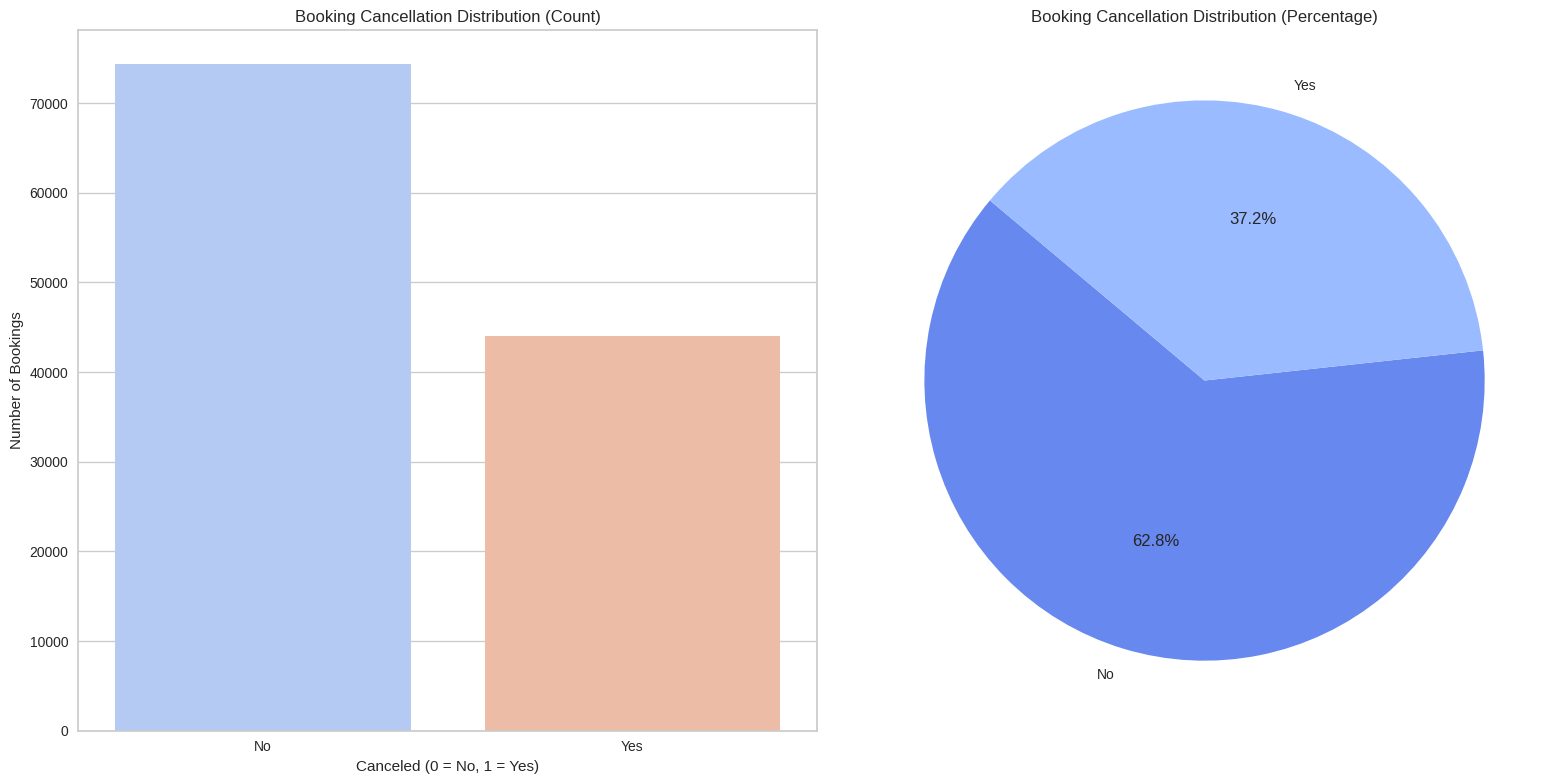

In [23]:
# Plot Count of Cancellations and Pie Chart of Percentages
plt.figure(figsize=(16, 8))

# Count Plot for Cancellations
plt.subplot(1, 2, 1)  # First subplot in a 1x2 grid
sns.countplot(x='is_canceled', data=df_eda, palette='coolwarm')
plt.title('Booking Cancellation Distribution (Count)')
plt.xlabel('Canceled (0 = No, 1 = Yes)')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Percentage Pie Chart for Cancellations
plt.subplot(1, 2, 2)  # Second subplot in a 1x2 grid
cancellation_counts = df_eda['is_canceled'].value_counts()
cancellation_percentages = cancellation_counts / cancellation_counts.sum() * 100

# Plot Pie Chart
plt.pie(cancellation_percentages, labels=['No', 'Yes'], autopct='%1.1f%%',
        colors=sns.color_palette('coolwarm'), startangle=140)
plt.title('Booking Cancellation Distribution (Percentage)')

plt.tight_layout()
plt.show()

## Factors That influence Default Loan

### 5.1 Data Preprocessing

In [24]:
df_clean.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'arrival_date', 'season'],
      dtype='object')

In [25]:
features = ['hotel', 'lead_time', 'stays_in_weekend_nights',
            'stays_in_week_nights', 'adults', 'children', 'babies',
            'market_segment', 'is_repeated_guest', 'previous_cancellations',
            'previous_bookings_not_canceled', 'reserved_room_type',
            'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
            'required_car_parking_spaces', 'total_of_special_requests', 'is_canceled',]

df_predict = df_clean[features]

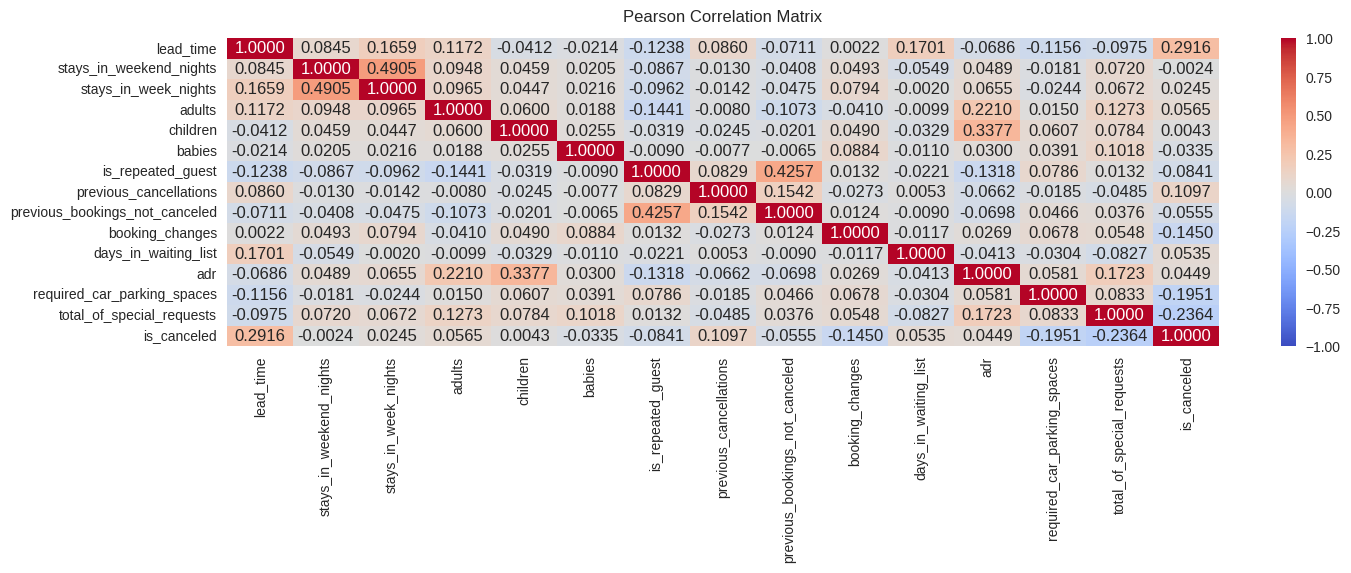

In [26]:
# Set the figure size
plt.figure(figsize=(16, 4))

# Calculate the correlation matrix for numerical columns only
correlation_matrix = df_predict.select_dtypes(include=['float64', 'int64']).corr()

# Create the heatmap
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".4f")

# Add a title to the heatmap
heatmap.set_title('Pearson Correlation Matrix', fontdict={'fontsize': 12}, pad=12)

# Display the heatmap
plt.show()

Creates a copy of the dataset and selects only the necessary columns for the analysis.

### 4.3 Split Features and Target

Separates the features and target variable, then splits the data into training and testing sets.

In [27]:
# Split the dataset into features (X) and target variable (y)
X = df_predict.drop(['is_canceled'], axis=1)
y = df_predict['is_canceled']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# Print the shapes of the training and testing sets
print("Training and Testing Set Shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Training and Testing Set Shapes:
X_train: (88806, 19)
y_train: (88806,)
X_test: (29602, 19)
y_test: (29602,)


### 4.4 Feature Scaling and Encoding

Identifies and separates numerical and categorical features from the training and testing sets.


In [28]:
# Select numerical and categorical features
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Pipeline for numerical features (Scaling)
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline for categorical features (One-Hot Encoding)
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse=False))  # drop='first' to avoid dummy variable trap
])

# Combine pipelines with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Apply preprocessing to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Print the shapes of the processed data
print("Processed Data Shapes:")
print(f"X_train_processed: {X_train_processed.shape}")
print(f"X_test_processed: {X_test_processed.shape}")

Processed Data Shapes:
X_train_processed: (88806, 34)
X_test_processed: (29602, 34)


In [29]:
# Generate feature names for the processed data
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

# Create DataFrame with feature names
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

### 4.5 Predict with Logistic Regression

In [30]:
# Define the model and train a Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train_processed_df, y_train)
model_lr

LogisticRegression()

In [31]:
# Make predictions on training and testing sets
y_pred_train = model_lr.predict(X_train_processed_df)
y_pred_test = model_lr.predict(X_test_processed_df)

In [32]:
# Calculate and print performance metrics for training and test data
accuracy_train_lr = accuracy_score(y_train, y_pred_train)
precision_train_lr = precision_score(y_train, y_pred_train)
recall_train_lr = recall_score(y_train, y_pred_train)
f1_train_lr = f1_score(y_train, y_pred_train)

accuracy_test_lr = accuracy_score(y_test, y_pred_test)
precision_test_lr = precision_score(y_test, y_pred_test)
recall_test_lr = recall_score(y_test, y_pred_test)
f1_test_lr = f1_score(y_test, y_pred_test)

# Display the metrics
print("Training Data Metrics:")
print(f"Accuracy: {accuracy_train_lr:.4f}")
print(f"Precision: {precision_train_lr:.4f}")
print(f"Recall: {recall_train_lr:.4f}")
print(f"F1-Score: {f1_train_lr:.4f}")

print("\nTest Data Metrics:")
print(f"Accuracy: {accuracy_test_lr:.4f}")
print(f"Precision: {precision_test_lr:.4f}")
print(f"Recall: {recall_test_lr:.4f}")
print(f"F1-Score: {f1_test_lr:.4f}")

Training Data Metrics:
Accuracy: 0.8103
Precision: 0.8447
Recall: 0.6002
F1-Score: 0.7018

Test Data Metrics:
Accuracy: 0.8101
Precision: 0.8393
Recall: 0.6041
F1-Score: 0.7025


In [33]:
# Classification report untuk training data
print("Classification Report - Training Data (Logistic Regression):")
print(classification_report(y_train, y_pred_train))

# Classification report untuk test data
print("Classification Report - Test Data (Logistic Regression):")
print(classification_report(y_test, y_pred_test))

Classification Report - Training Data (Logistic Regression):
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     55777
           1       0.84      0.60      0.70     33029

    accuracy                           0.81     88806
   macro avg       0.82      0.77      0.78     88806
weighted avg       0.82      0.81      0.80     88806

Classification Report - Test Data (Logistic Regression):
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     18617
           1       0.84      0.60      0.70     10985

    accuracy                           0.81     29602
   macro avg       0.82      0.77      0.78     29602
weighted avg       0.81      0.81      0.80     29602



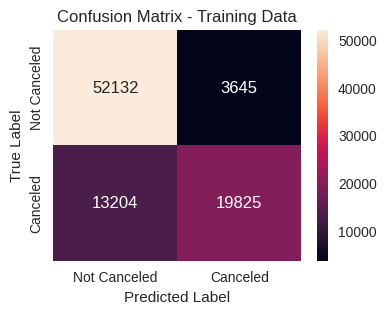

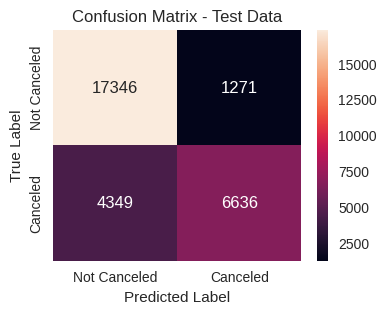

In [34]:
# Calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plot Confusion Matrix for training data
plt.figure(figsize=(4, 3))
sns.heatmap(cm_train, annot=True, fmt='d', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot Confusion Matrix for test data
plt.figure(figsize=(4, 3))
sns.heatmap(cm_test, annot=True, fmt='d', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
# Get the feature names from the preprocessor
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(categorical_feature_names)

# Get the coefficients from the logistic regression model
coefficients = model_lr.coef_.flatten()  # Flatten the array if it's not 1D

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})

# Sort features by the absolute value of their coefficients
feature_importances['Abs_Coefficient'] = feature_importances['Coefficient'].abs()
feature_importances_sorted = feature_importances.sort_values(by='Abs_Coefficient', ascending=False)

# Access and print the intercept
intercept = model_lr.intercept_[0]
print(f"\nIntercept: {intercept:.4f}")

# Convert the intercept to a probability
probability = 1 / (1 + np.exp(-intercept))
print(f"Intercept as Probability: {probability:.4f}")

# Print the sorted feature importances
print("Feature Importances:")
print(feature_importances_sorted[['Feature', 'Coefficient']])


Intercept: -3.1522
Intercept as Probability: 0.0410
Feature Importances:
                           Feature  Coefficient
12     required_car_parking_spaces    -5.907588
29         deposit_type_Non Refund     5.342763
7           previous_cancellations     2.487701
32         customer_type_Transient     0.845394
8   previous_bookings_not_canceled    -0.777344
20        market_segment_Online TA     0.730370
19    market_segment_Offline TA/TO    -0.677699
13       total_of_special_requests    -0.585630
17           market_segment_Direct    -0.428877
0                        lead_time     0.411968
33   customer_type_Transient-Party     0.378716
28            reserved_room_type_L     0.362748
25            reserved_room_type_F    -0.311738
9                  booking_changes    -0.256951
11                             adr     0.210618
31             customer_type_Group     0.201499
16        market_segment_Corporate    -0.167231
22            reserved_room_type_C     0.136663
21            

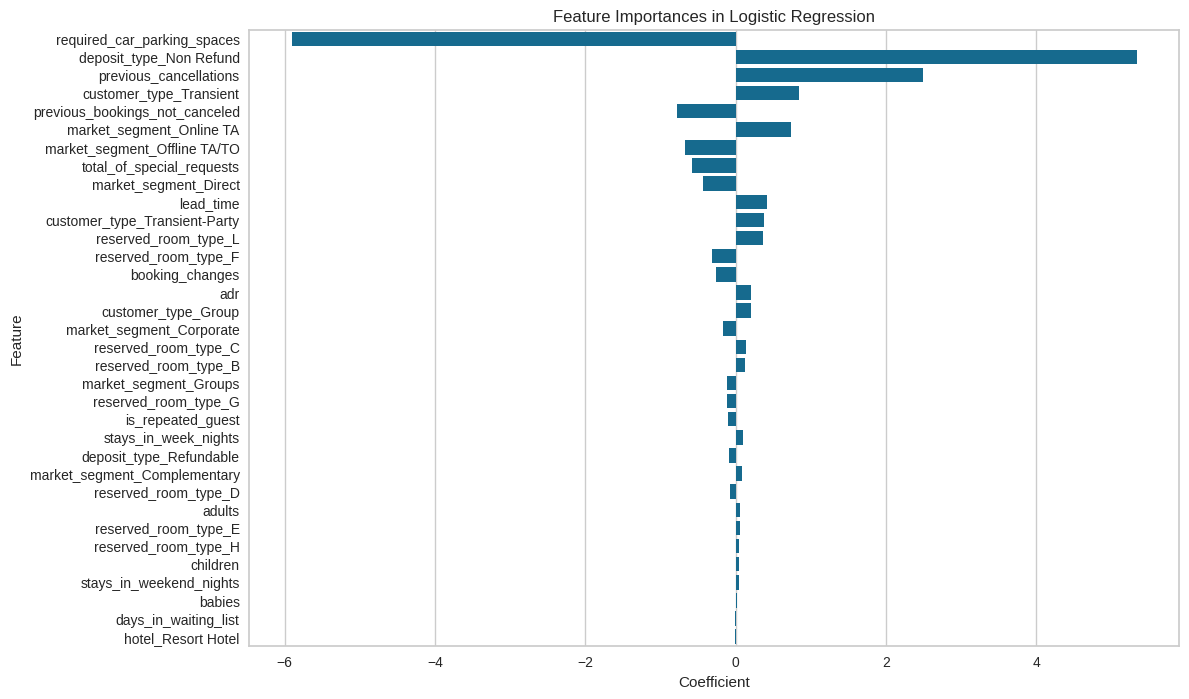

In [36]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importances_sorted)
plt.title('Feature Importances in Logistic Regression')
plt.show()

In [37]:
# Predict probabilities for the training data
y_prob_train = model_lr.predict_proba(X_train_processed_df)[:, 1]
# Predict probabilities for the test data
y_prob_test = model_lr.predict_proba(X_test_processed_df)[:, 1]

# Calculate ROC curve for the training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
# Calculate ROC curve for the test data
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)

# Calculate AUC for the training and test data
roc_auc_train = roc_auc_score(y_train, y_prob_train)
roc_auc_test = roc_auc_score(y_test, y_prob_test)

# Calculate Gini coefficient from AUC
gini_train = 2 * roc_auc_train - 1
gini_test = 2 * roc_auc_test - 1

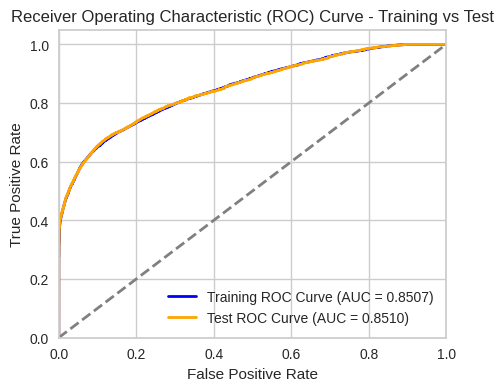

In [38]:
# Plot ROC curves for both training and test data
plt.figure(figsize=(5, 4))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC Curve (AUC = {roc_auc_train:.4f})')
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'Test ROC Curve (AUC = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training vs Test')
plt.legend(loc='lower right')
plt.show()

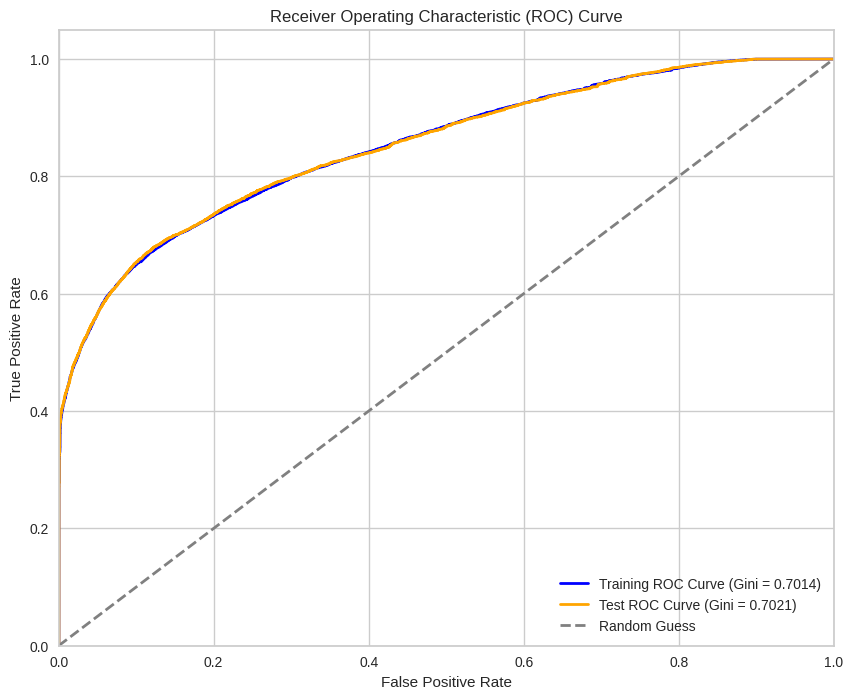

In [39]:
# Plot ROC curves for both training and test data
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC Curve (Gini = {gini_train:.4f})')
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'Test ROC Curve (Gini = {gini_test:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

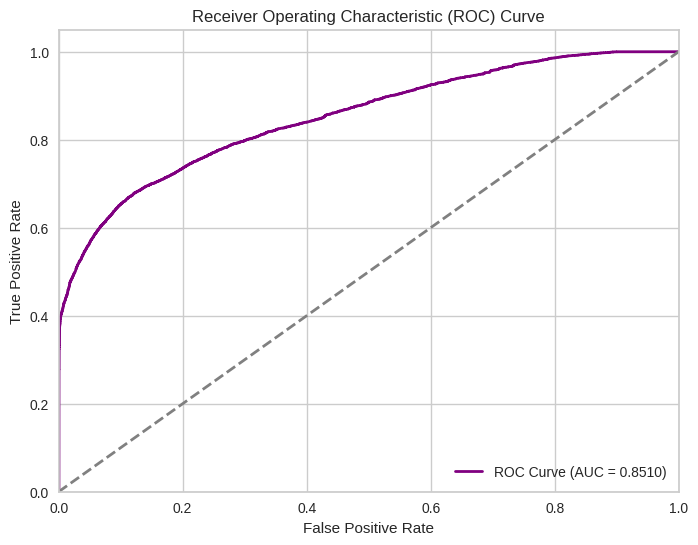

In [40]:
# Predict probabilities for the test data
y_prob_test = model_lr.predict_proba(X_test_processed_df)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_prob_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 4.6 Predict with Random Forest

In [41]:
# Define the Random Forest model with specified hyperparameters
model_rf = RandomForestClassifier(
    class_weight={0: 1, 1: 2},
    criterion='entropy',
    max_depth=18,
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=150,
    random_state=42
)

# Train the model with the training data
model_rf.fit(X_train_processed_df, y_train)

# Output the trained model
model_rf

RandomForestClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=18, min_samples_split=4, n_estimators=150,
                       random_state=42)

In [42]:
# Make predictions on training and test data
y_pred_train_rf = model_rf.predict(X_train_processed_df)
y_pred_test_rf = model_rf.predict(X_test_processed_df)

# Classification report for training data
print("Classification Report - Training Data (Random Forest):")
print(classification_report(y_train, y_pred_train_rf))

# Classification report for test data
print("Classification Report - Test Data (Random Forest):")
print(classification_report(y_test, y_pred_test_rf))

Classification Report - Training Data (Random Forest):
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     55777
           1       0.79      0.82      0.80     33029

    accuracy                           0.85     88806
   macro avg       0.84      0.85      0.84     88806
weighted avg       0.85      0.85      0.85     88806

Classification Report - Test Data (Random Forest):
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     18617
           1       0.76      0.78      0.77     10985

    accuracy                           0.83     29602
   macro avg       0.82      0.82      0.82     29602
weighted avg       0.83      0.83      0.83     29602



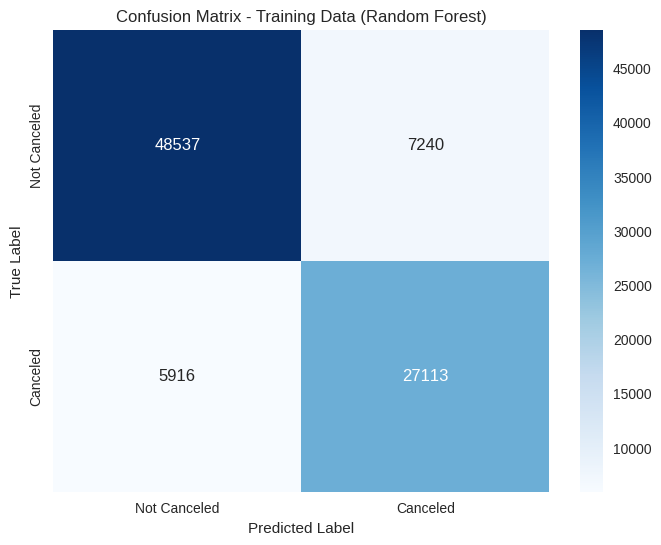

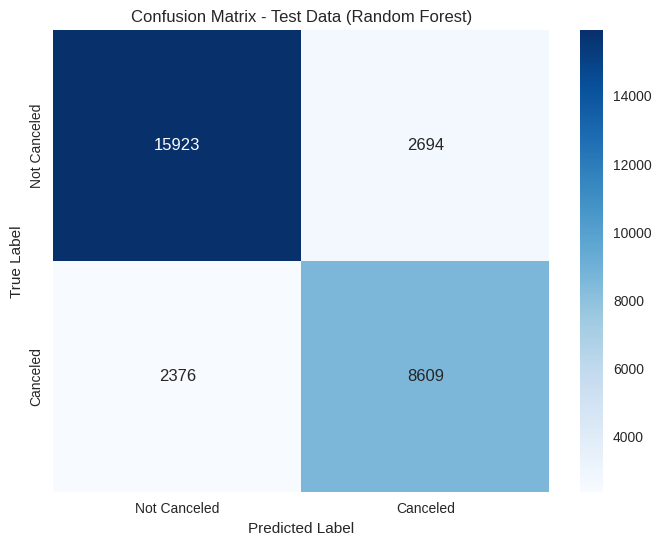

In [43]:
# Calculate confusion matrix for training and test data
cm_train_rf = confusion_matrix(y_train, y_pred_train_rf)
cm_test_rf = confusion_matrix(y_test, y_pred_test_rf)

# Plot Confusion Matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - Training Data (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot Confusion Matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - Test Data (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


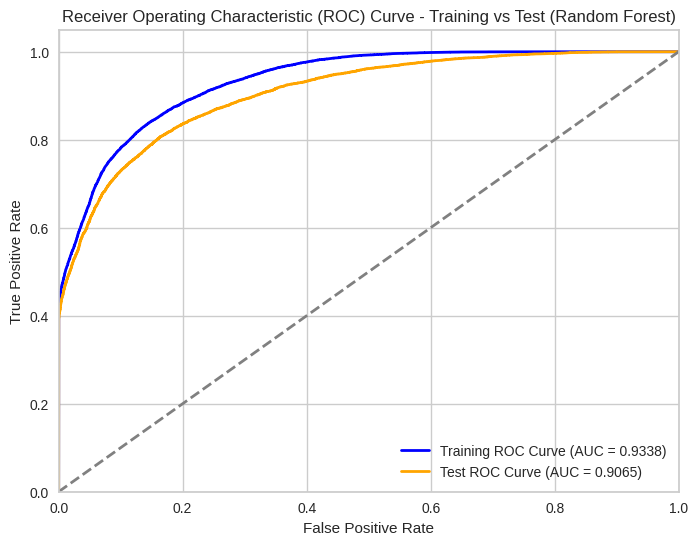

In [44]:
# Predict probabilities for the training and test data
y_prob_train_rf = model_rf.predict_proba(X_train_processed_df)[:, 1]
y_prob_test_rf = model_rf.predict_proba(X_test_processed_df)[:, 1]

# Calculate ROC curve for the training data
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train, y_prob_train_rf)
# Calculate ROC curve for the test data
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_prob_test_rf)

# Calculate AUC for the training and test data
roc_auc_train_rf = roc_auc_score(y_train, y_prob_train_rf)
roc_auc_test_rf = roc_auc_score(y_test, y_prob_test_rf)

# Plot ROC curves for both training and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_rf, tpr_train_rf, color='blue', lw=2, label=f'Training ROC Curve (AUC = {roc_auc_train_rf:.4f})')
plt.plot(fpr_test_rf, tpr_test_rf, color='orange', lw=2, label=f'Test ROC Curve (AUC = {roc_auc_test_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training vs Test (Random Forest)')
plt.legend(loc='lower right')
plt.show()


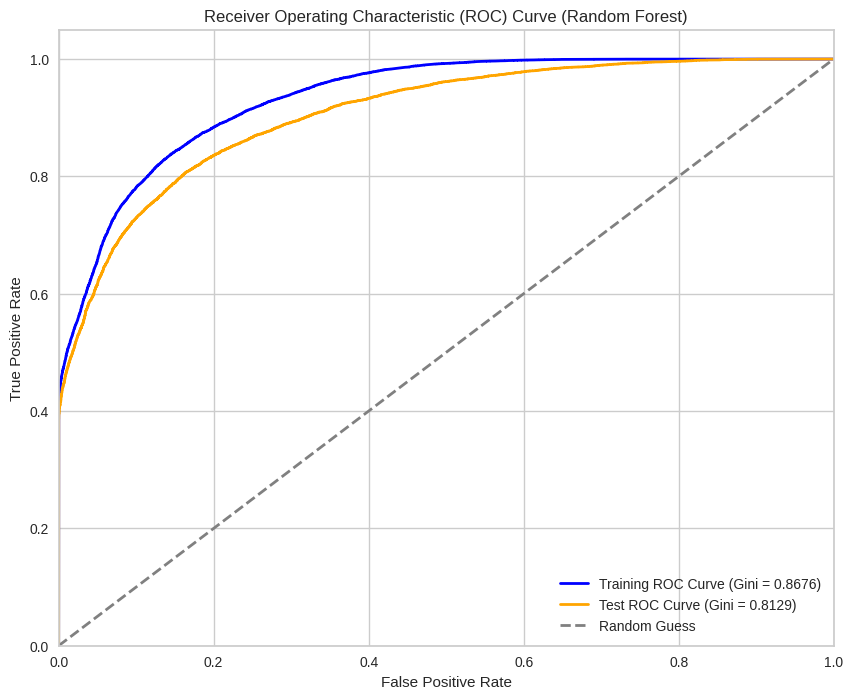

In [45]:
# Calculate Gini coefficient from AUC
gini_train_rf = 2 * roc_auc_train_rf - 1
gini_test_rf = 2 * roc_auc_test_rf - 1

# Plot ROC curves with Gini coefficient for both training and test data
plt.figure(figsize=(10, 8))
plt.plot(fpr_train_rf, tpr_train_rf, color='blue', lw=2, label=f'Training ROC Curve (Gini = {gini_train_rf:.4f})')
plt.plot(fpr_test_rf, tpr_test_rf, color='orange', lw=2, label=f'Test ROC Curve (Gini = {gini_test_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()


### 4.7 Predict with XGBoost

In [46]:
# Define the XGBoost model with specified hyperparameters
model_xgb = XGBClassifier(
    colsample_bytree=0.9,
    learning_rate=0.1,
    max_depth=8,
    n_estimators=350,
    scale_pos_weight=1.697231588790343,
    subsample=0.7,
    random_state=42
)

# Train the XGBoost model with the training data
model_xgb.fit(X_train_processed_df, y_train)

# Output the trained model
model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [47]:
# Make predictions on training and test data
y_pred_train_xgb = model_xgb.predict(X_train_processed_df)
y_pred_test_xgb = model_xgb.predict(X_test_processed_df)

# Classification report for training data
print("Classification Report - Training Data (XGBoost):")
print(classification_report(y_train, y_pred_train_xgb))

# Classification report for test data
print("Classification Report - Test Data (XGBoost):")
print(classification_report(y_test, y_pred_test_xgb))

Classification Report - Training Data (XGBoost):
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     55777
           1       0.84      0.86      0.85     33029

    accuracy                           0.88     88806
   macro avg       0.88      0.88      0.88     88806
weighted avg       0.89      0.88      0.88     88806

Classification Report - Test Data (XGBoost):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     18617
           1       0.78      0.79      0.78     10985

    accuracy                           0.84     29602
   macro avg       0.83      0.83      0.83     29602
weighted avg       0.84      0.84      0.84     29602



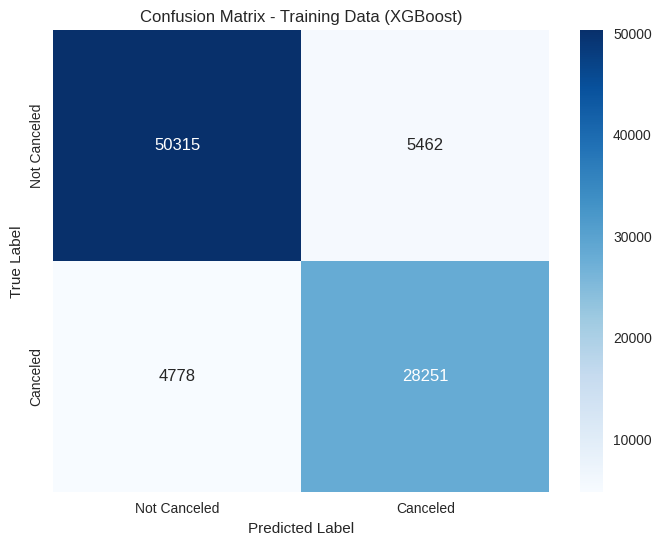

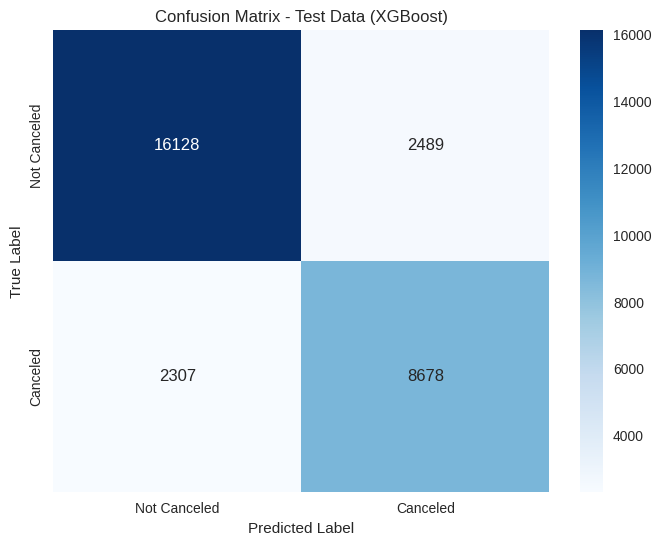

In [48]:
# Calculate confusion matrix for training and test data
cm_train_xgb = confusion_matrix(y_train, y_pred_train_xgb)
cm_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

# Plot Confusion Matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - Training Data (XGBoost)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot Confusion Matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - Test Data (XGBoost)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

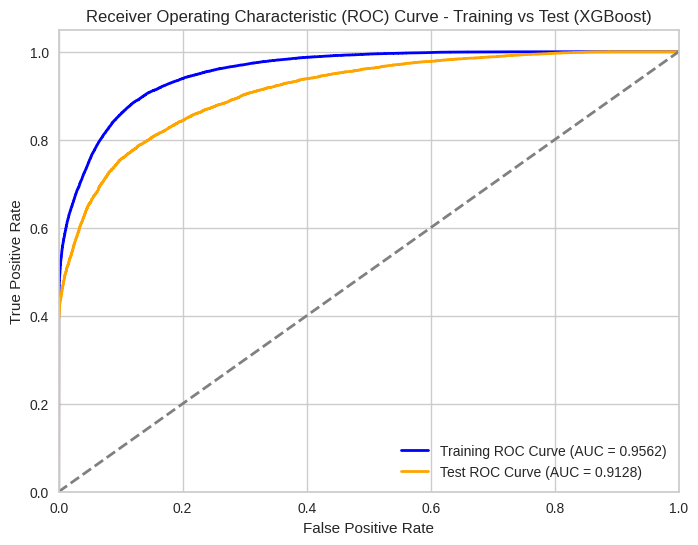

In [49]:
# Predict probabilities for the training and test data
y_prob_train_xgb = model_xgb.predict_proba(X_train_processed_df)[:, 1]
y_prob_test_xgb = model_xgb.predict_proba(X_test_processed_df)[:, 1]

# Calculate ROC curve for the training data
fpr_train_xgb, tpr_train_xgb, _ = roc_curve(y_train, y_prob_train_xgb)
# Calculate ROC curve for the test data
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_prob_test_xgb)

# Calculate AUC for the training and test data
roc_auc_train_xgb = roc_auc_score(y_train, y_prob_train_xgb)
roc_auc_test_xgb = roc_auc_score(y_test, y_prob_test_xgb)

# Plot ROC curves for both training and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_xgb, tpr_train_xgb, color='blue', lw=2, label=f'Training ROC Curve (AUC = {roc_auc_train_xgb:.4f})')
plt.plot(fpr_test_xgb, tpr_test_xgb, color='orange', lw=2, label=f'Test ROC Curve (AUC = {roc_auc_test_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training vs Test (XGBoost)')
plt.legend(loc='lower right')
plt.show()

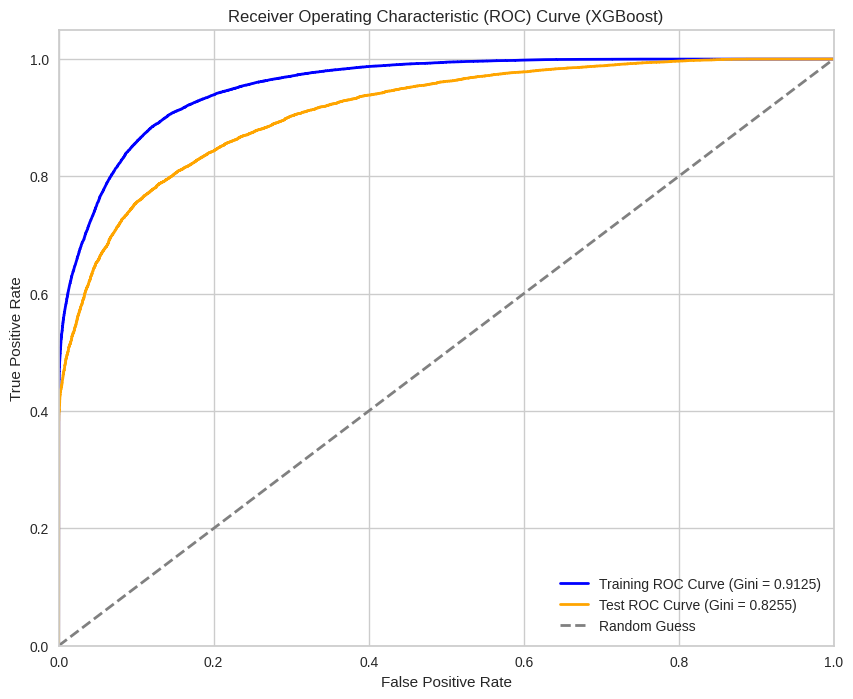

In [50]:
# Calculate Gini coefficient from AUC
gini_train_xgb = 2 * roc_auc_train_xgb - 1
gini_test_xgb = 2 * roc_auc_test_xgb - 1

# Plot ROC curves with Gini coefficient for both training and test data
plt.figure(figsize=(10, 8))
plt.plot(fpr_train_xgb, tpr_train_xgb, color='blue', lw=2, label=f'Training ROC Curve (Gini = {gini_train_xgb:.4f})')
plt.plot(fpr_test_xgb, tpr_test_xgb, color='orange', lw=2, label=f'Test ROC Curve (Gini = {gini_test_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (XGBoost)')
plt.legend(loc='lower right')
plt.show()


### 4.8 Conclusion

This project addresses a critical issue in the hospitality industry: hotel booking cancellations. Accurate prediction of cancellations can significantly enhance revenue management and operational efficiency for hotels. By developing and evaluating predictive models, including Linear Regression, Random Forest, and XGBoost, we have gained valuable insights into the factors influencing cancellations.

**Model Performance Summary:**

1. Linear Regression

  - Training Accuracy: 81%
  - Test Accuracy: 81%
  - Strengths: Good precision and recall for both classes, but lower F1-Scores.
  - Weaknesses: Less effective with class imbalance.

2. Random Forest

  - Training Accuracy: 85%
  - Test Accuracy: 83%
  - Strengths: High precision, recall, and F1-Scores for both classes. Handles class imbalance better than Linear Regression.
  - Weaknesses: Slightly lower performance on test data compared to training.

3. XGBoost

  - Training Accuracy: 89%
  - Test Accuracy: 84%
  - Strengths: Highest precision, recall, and F1-Scores. Best overall performance, handles class imbalance effectively.
  - Weaknesses: Slightly lower test performance compared to training.

**Practical Implications:**

**The XGBoost model's** superior performance suggests that it is well-suited for predicting hotel booking cancellations. By leveraging this model, hotels can better anticipate cancellations, optimize resource allocation, and mitigate financial losses.

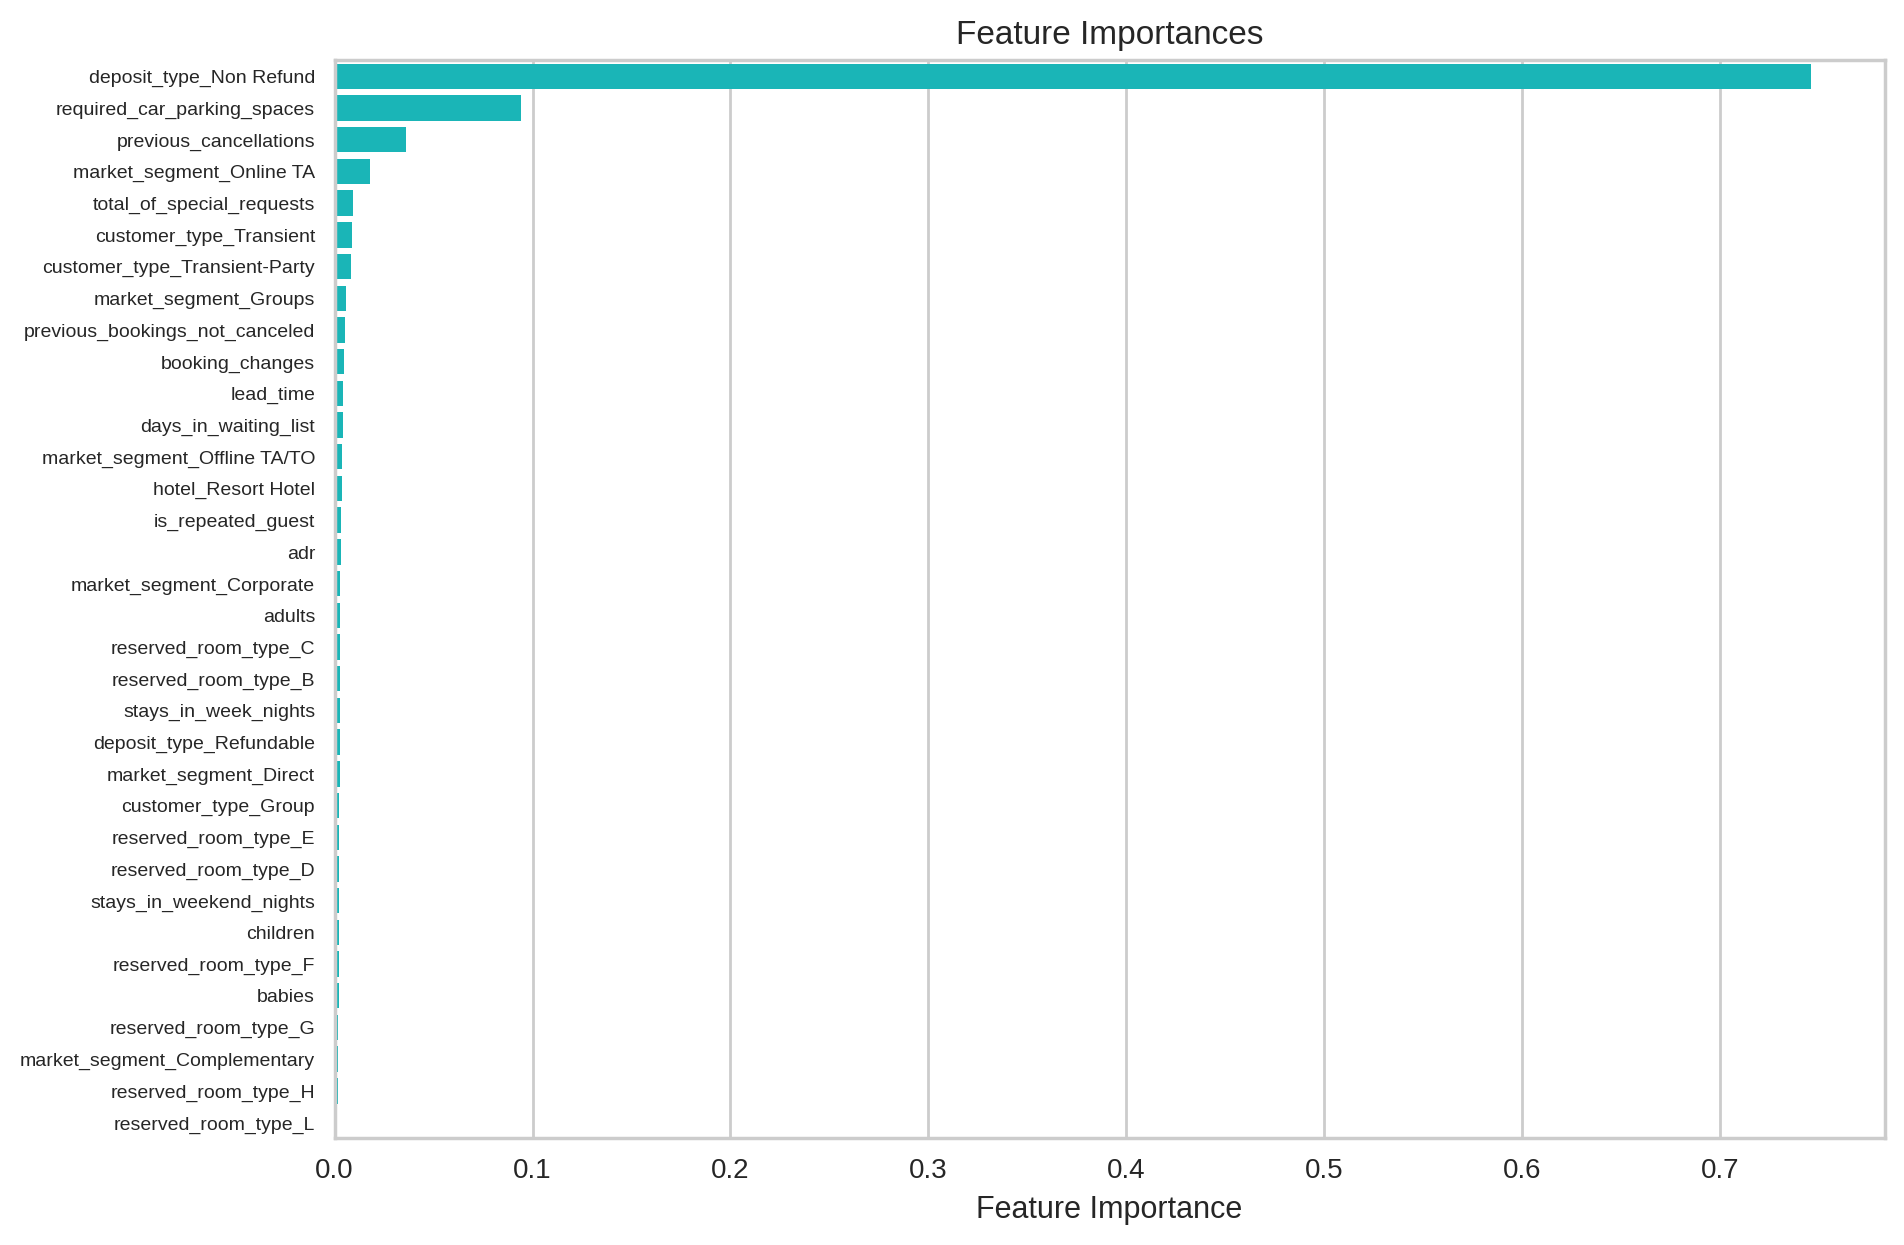

In [51]:
# Compute feature importances from the XGBoost model
feature_importances = model_xgb.feature_importances_

# Sort the feature importances in descending order and get the indices
sorted_indices = np.argsort(feature_importances)[::-1]

# Get numerical feature names from the training data
numerical_features = X_train_processed_df.select_dtypes(include=np.number).columns.tolist()

# Get categorical feature names from the preprocessor
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = numerical_features + list(categorical_feature_names)

# Ensure feature names are aligned with feature importances
feature_names = np.array(all_feature_names)

# Plot feature importances
plt.figure(figsize=(10, 7), dpi=200)
sns.barplot(x=feature_importances[sorted_indices], y=feature_names[sorted_indices], color='darkturquoise')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.yticks(fontsize=7)
plt.show()

## Loan Applicant Segmentation Analysis

### 4.1 Data Preprocessing

In [52]:
features = [
    'deposit_type',
    'required_car_parking_spaces',
    'previous_cancellations',
    'market_segment',
    'total_of_special_requests',
    'customer_type',
    'previous_bookings_not_canceled',
    'booking_changes',
    'lead_time'
]

df_segment = df_clean[features]
df_segment.head()

,deposit_type,required_car_parking_spaces,previous_cancellations,market_segment,total_of_special_requests,customer_type,previous_bookings_not_canceled,booking_changes,lead_time
0,No Deposit,0,0,Direct,0,Transient,0,3,342
1,No Deposit,0,0,Direct,0,Transient,0,4,737
2,No Deposit,0,0,Direct,0,Transient,0,0,7
3,No Deposit,0,0,Corporate,0,Transient,0,0,13
4,No Deposit,0,0,Online TA,1,Transient,0,0,14


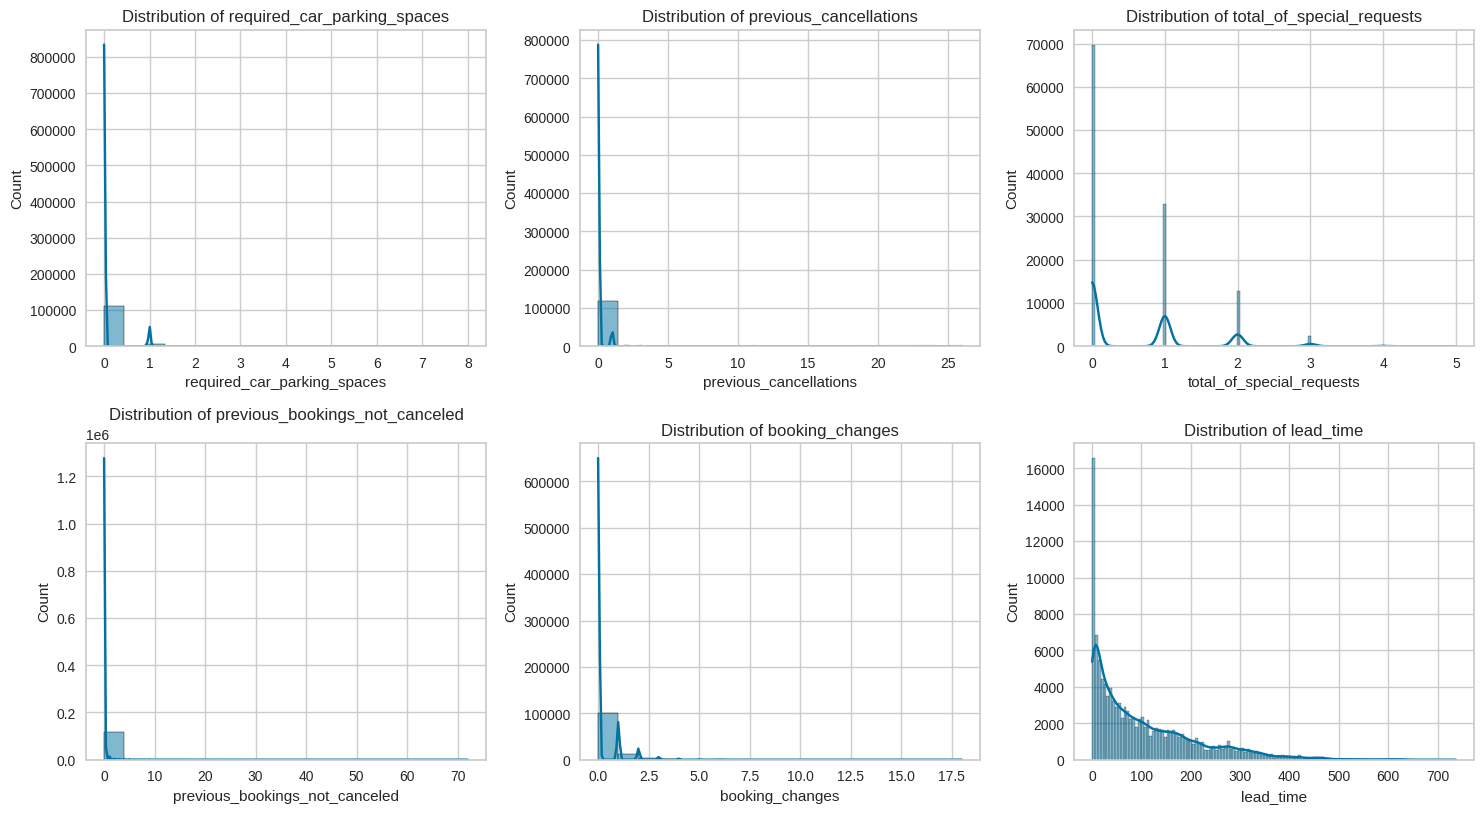

In [53]:
def plot_distributions(df):
    # Get all column names from the DataFrame
    columns = df.columns

    # Determine the number of subplots needed
    num_columns = len(columns)

    # Determine the number of rows and columns for subplots
    num_rows = 3
    num_cols = min(3, num_columns)

    # Create a figure with subplots
    plt.figure(figsize=(5 * num_cols, 4 * num_rows))

    # Plot each column's distribution
    for i, column in enumerate(columns):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Example usage with the dataframe 'df_segmentation_feature'
numerical_features = df_segment.select_dtypes(include=np.number).columns.tolist()

plot_distributions(df_segment[numerical_features])

In [54]:
# Categorical features to be one-hot encoded
categorical_features = df_segment.select_dtypes(include=['object']).columns.tolist()

# Pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline for categorical features with One-Hot Encoding
one_hot_encoding_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse=False))  # drop='first' to avoid dummy variable trap
])

# Combine pipelines with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat_onehot', one_hot_encoding_pipeline, categorical_features)
    ])

# Apply preprocessing to the data
X_processed = preprocessor.fit_transform(df_segment)

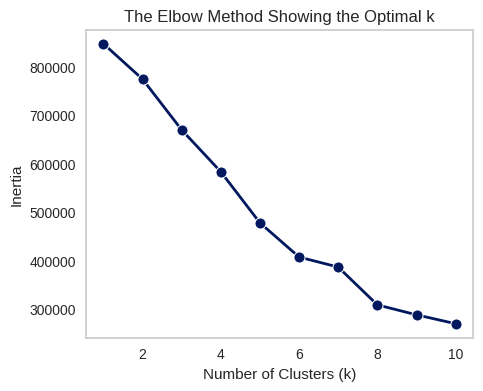

In [55]:
# Define the range of k values to try
k_range = range(1, 11)
distortions = []

# Compute distortions for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_processed)
    distortions.append(kmeans.inertia_)

# Visualize the Elbow Method
plt.figure(figsize=(5, 4))
sns.lineplot(x=k_range, y=distortions, marker='o', color='#01185F', linewidth=2, markersize=8)
plt.title('The Elbow Method Showing the Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Remove gridlines
plt.grid(False)

plt.show()

In [56]:
# Print the inertia values for different numbers of clusters
for k, distortion in zip(k_range, distortions):
    print(f'Number of Clusters: {k}, Inertia: {distortion}')

Number of Clusters: 1, Inertia: 847680.176499869
Number of Clusters: 2, Inertia: 774582.1371791521
Number of Clusters: 3, Inertia: 669951.4165153091
Number of Clusters: 4, Inertia: 583440.5449196672
Number of Clusters: 5, Inertia: 478103.0347217535
Number of Clusters: 6, Inertia: 407597.4218819675
Number of Clusters: 7, Inertia: 386852.3917310836
Number of Clusters: 8, Inertia: 308863.88075485115
Number of Clusters: 9, Inertia: 288415.5944119795
Number of Clusters: 10, Inertia: 270037.87564413546


For k=2, the average Silhouette score is 0.27372965231154844
For k=3, the average Silhouette score is 0.2946807373626872
For k=4, the average Silhouette score is 0.24610818877450719
For k=5, the average Silhouette score is 0.25489503364483296
For k=6, the average Silhouette score is 0.2592875293833226
For k=7, the average Silhouette score is 0.2771580969461995
For k=8, the average Silhouette score is 0.22879274539638203
For k=9, the average Silhouette score is 0.24731274426418887


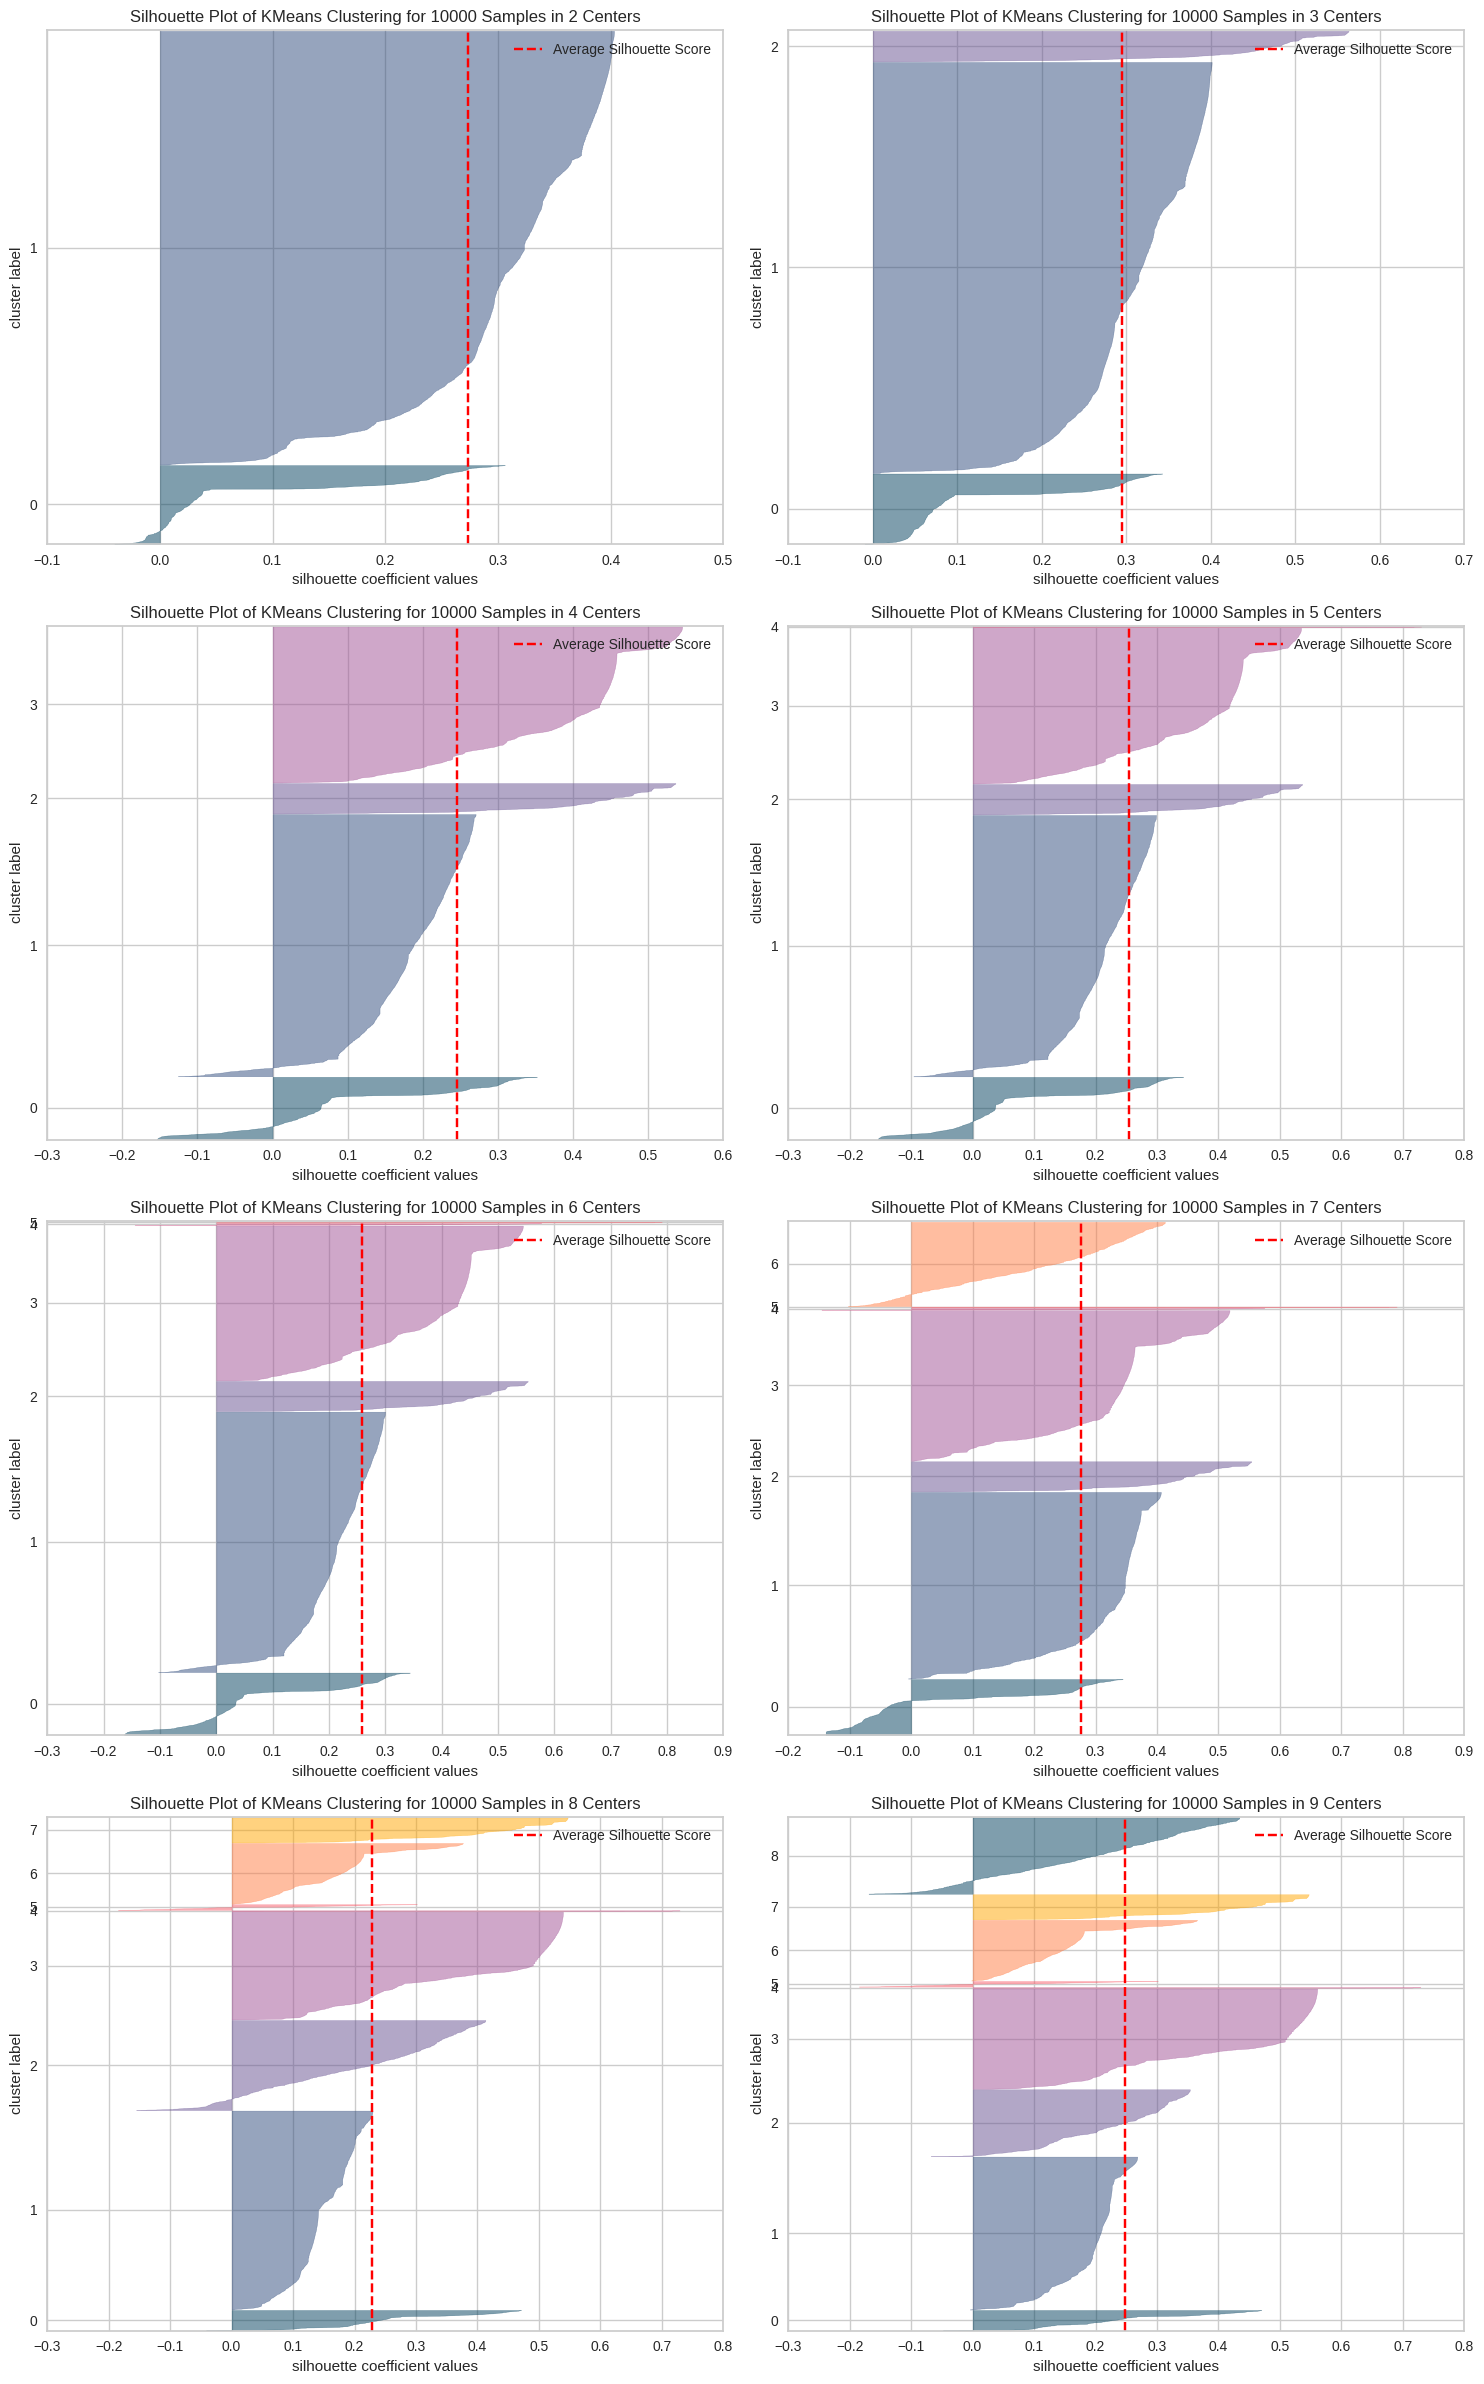

In [57]:
# Convert X_processed to DataFrame
feature_names = numerical_features + list(preprocessor.named_transformers_['cat_onehot'].named_steps['onehot'].get_feature_names_out(categorical_features))
df_processed = pd.DataFrame(X_processed, columns=feature_names)

# Sample a subset of data if the dataset is very large
X_processed_sampled = df_processed.sample(n=10000, random_state=42)

# Define range of K values for Silhouette analysis
K = range(2, 10)
num_rows = int(np.ceil(len(K) / 2))
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 6 * num_rows))

# Define a blue color palette
blue_palette = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']

for i, n_clusters in enumerate(K):
    kmeanModel = KMeans(n_clusters=n_clusters, random_state=10, n_init='auto')
    sil = SilhouetteVisualizer(kmeanModel, ax=axes.flatten()[i], colors=blue_palette[:n_clusters])
    sil.fit(X_processed_sampled)
    sil.finalize()
    print(f"For k={n_clusters}, the average Silhouette score is {sil.silhouette_score_}")

plt.tight_layout()
plt.show()

In [58]:
# Extracting the feature names from the fitted preprocessor
onehot_feature_names = preprocessor.named_transformers_['cat_onehot'].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(onehot_feature_names)

# Convert X_processed to a DataFrame with appropriate column names
df3_kmeans = pd.DataFrame(X_processed, columns=feature_names)

# Keep a copy of the original DataFrame
df3 = df_clean.copy()

# Initialize the KMeans clustering model with 3 clusters and a fixed random state for reproducibility
cluster_model = KMeans(n_clusters=3, random_state=13)

# Fit the KMeans model to the scaled data
cluster_model.fit(df3_kmeans)

# Assign cluster labels to the scaled and original dataframes
df3_kmeans['segment'] = cluster_model.labels_
df3['segment'] = df3_kmeans['segment'].values

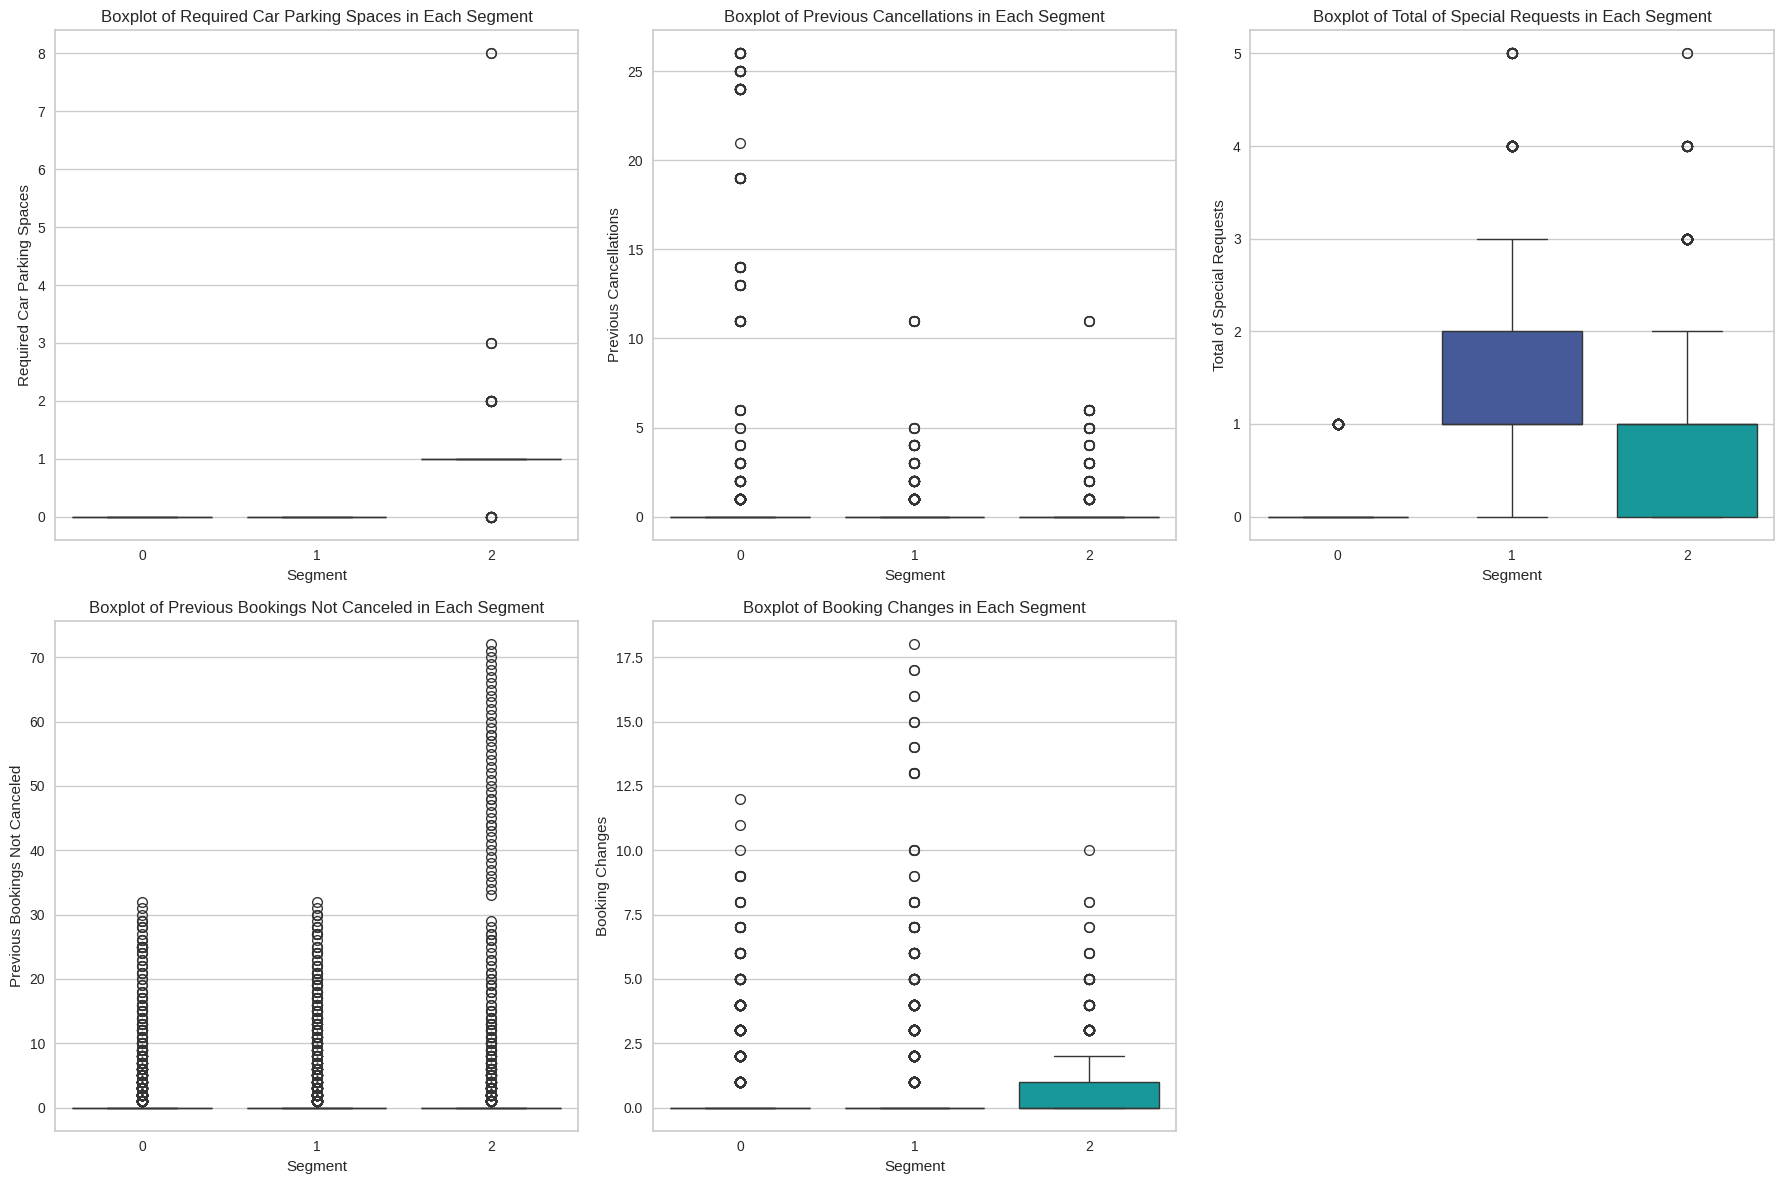

In [59]:
# Define custom color palette for segments
custom_palette = {'0': '#90AFC8', '1': '#3852A6', '2': '#03ADAD', '3': '#FF4A1F', '4': '#FEB15F'}

# Define the columns and titles for the subplots
plots = [
    ('required_car_parking_spaces', 'Required Car Parking Spaces'),
    ('previous_cancellations', 'Previous Cancellations'),
    ('total_of_special_requests', 'Total of Special Requests'),
    ('previous_bookings_not_canceled', 'Previous Bookings Not Canceled'),
    ('booking_changes', 'Booking Changes')
]

# Create a figure with subplots arranged in 2 rows and 3 columns
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Plot each boxplot using a loop
for i, (col, title) in enumerate(plots):
    row, col_idx = divmod(i, 3)
    sns.boxplot(
        data=df3,
        x='segment',
        y=col,
        palette=custom_palette,
        ax=ax[row, col_idx],
        showfliers=True
    )
    ax[row, col_idx].set_title(f'Boxplot of {title} in Each Segment')
    ax[row, col_idx].set_xlabel('Segment')
    ax[row, col_idx].set_ylabel(title)

# Hide the empty subplot (ax[1, 2])
ax[1, 2].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [60]:
# Select numeric feature columns
num_features = ['is_canceled',
                'lead_time',
                'adults',
                'children',
                'babies',
                'is_repeated_guest',
                'previous_cancellations',
                'previous_bookings_not_canceled',
                'booking_changes',
                'days_in_waiting_list',
                'adr',
                'required_car_parking_spaces',
                'total_of_special_requests']

# Select categorical feature columns
cat_features = ['hotel',
                'arrival_date_month',
                'meal',
                'country',
                'market_segment',
                'distribution_channel',
                'reserved_room_type',
                'assigned_room_type',
                'deposit_type',
                'customer_type']

# Calculate mean values for numeric features by Segment
mean_numeric_by_segment = df3.groupby('segment')[num_features].mean().reset_index(drop=False)

# Calculate mode (most common value) for categorical features by segment
mode_categorical_by_segment = df3.groupby('segment')[cat_features].agg(pd.Series.mode).reset_index(drop=False)

In [61]:
# Display the results
print("Mean values for numeric features by segment:")
print(mean_numeric_by_segment)

Mean values for numeric features by segment:
   segment  is_canceled   lead_time    adults  children    babies  \
0        0     0.479242  123.898840  1.810888  0.073421  0.002360   
1        1     0.252896   79.600211  1.952582  0.131111  0.014800   
2        2     0.000409   55.187722  1.893179  0.193179  0.022101   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0           0.027099                0.128530                        0.074502   
1           0.029133                0.022457                        0.133369   
2           0.088677                0.050068                        0.671623   

   booking_changes  days_in_waiting_list         adr  \
0         0.186012              3.882176   94.926644   
1         0.244257              0.042387  112.699485   
2         0.386903              0.096044  113.577730   

   required_car_parking_spaces  total_of_special_requests  
0                     0.000000                   0.052407  
1           

In [62]:
print("\nMost common values for categorical features by segment:")
print(mode_categorical_by_segment)


Most common values for categorical features by segment:
   segment         hotel arrival_date_month meal country market_segment  \
0        0    City Hotel            October   BB     PRT  Offline TA/TO   
1        1    City Hotel             August   BB     PRT      Online TA   
2        2  Resort Hotel             August   BB     PRT      Online TA   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0                TA/TO                  A                  A   No Deposit   
1                TA/TO                  A                  A   No Deposit   
2                TA/TO                  A                  A   No Deposit   

  customer_type  
0     Transient  
1     Transient  
2     Transient  


1. Segment 0: “Budget-Conscious Travelers”

  This segment represents travelers seeking affordable options with minimal commitments. They have high cancellation rates, short lead times, and low room rates, with few special requests. This suggests they are more flexible with their plans and less focused on luxury amenities, prioritizing cost over comfort.

2. Segment 1: “Leisure Travelers”

  This segment consists of travelers who are looking for comfortable accommodations and personalized experiences. They have moderate cancellation rates, longer lead times, higher room rates, and make more special requests. They are willing to pay a premium for amenities and services and plan their trips in advance, valuing comfort and customizations.

3. Segment 2: “Frequent Business Travelers”
  
  This segment represents frequent business travelers who value convenience and efficiency. They show low cancellation rates, shorter lead times, and the highest room rates, with numerous special requests. They tend to book closer to their stay date and require specific amenities for work or travel needs, often being part of loyalty programs and expecting a high level of service.

In [63]:
# Create a dictionary mapping segment numbers to names
segment_name_mapping = {
    0: 'Budget-Conscious Travelers',
    1: 'Leisure Travelers',
    2: 'Frequent Business Travelers'
}

# Create the 'Segment_Name' column in df5
df3['segment_name'] = df3['segment'].map(segment_name_mapping)

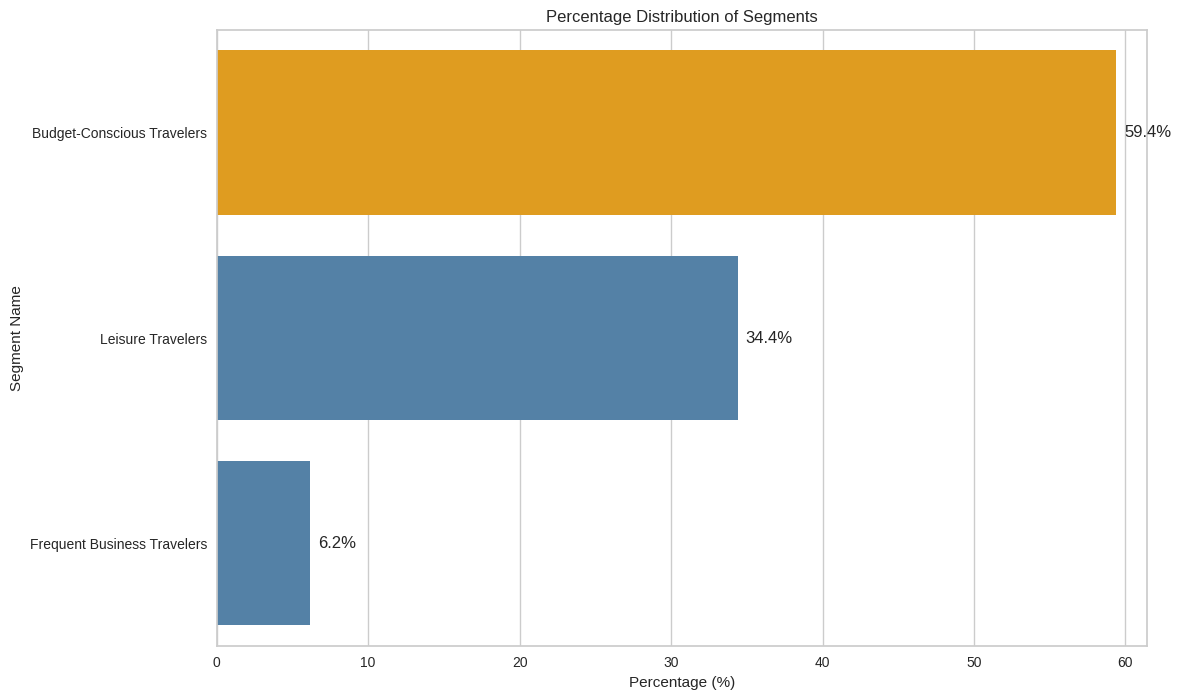

In [64]:
# Calculate the percentage for each segment
segment_percentages = df3['segment_name'].value_counts(normalize=True) * 100

# Sort the segments by percentage in descending order
segment_percentages = segment_percentages.sort_values(ascending=False)

# Plot a horizontal bar chart
plt.figure(figsize=(12, 8))
colors = ['orange' if i == 0 else 'steelblue' for i in range(len(segment_percentages))]
sns.barplot(x=segment_percentages.values, y=segment_percentages.index, palette=colors)

# Add data labels ensuring they fit within the chart
for index, value in enumerate(segment_percentages.values):
    plt.text(value + 0.5,
             index,
             f'{value:.1f}%',
             va='center',
             fontsize=12)

plt.title('Percentage Distribution of Segments')
plt.xlabel('Percentage (%)')
plt.ylabel('Segment Name')
plt.xlim(0, max(segment_percentages.values) + 2)
plt.show()

In [65]:
df3.to_csv('hotel_booking_segment.csv', index=False)